# Importación de las principales librerías

En esta sección del kernel vamos a cargar las principales librerías que vamos a usar en nuestro notebook.

In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import math
import numpy as np
import pandas as pd

# scientific computations library
import scipy as sp

# loading ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# import the function to compute cosine_similarity
import sklearn
from sklearn import set_config
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
PATH_FOLDER = os.path.join(os.getcwd(), "data_dsmarket")

In [3]:
set_config(transform_output = "pandas")

# Importación de los datos

En la presente sección del kernel vamos a cargar los principales datasets que vamos a usar para construir nuestro cluster.

In [4]:
PATH_ANIME = os.path.join('./data_dsmarket/preproc_data/full_df.csv')

retail_df = pd.read_csv(PATH_ANIME)

In [5]:
retail_df.drop('Unnamed: 0', axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

En la sección del EDA haremos **una primera aproximación a nuestros datos** para ver su composición y que variables tenemos a nuestra disposición.

In [6]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")

In [7]:
report_df(retail_df)

retail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   date                object 
 2   item                object 
 3   category            object 
 4   department          object 
 5   store_code          object 
 6   region              object 
 7   store               object 
 8   sales_count         int64  
 9   event_NewYear       bool   
 10  event_None          bool   
 11  event_SuperBowl     bool   
 12  event_Thanksgiving  bool   
 13  event_Ramadan       bool   
 14  sell_price          float64
 15  revenue             float64
dtypes: bool(5), float64(2), int64(1), object(8)
memory usage: 738.2+ MB
None

Tenemos un total de 3514118 nulos


,id,date,item,category,department,store_code,region,store,sales_count,event_NewYear,event_None,event_SuperBowl,event_Thanksgiving,event_Ramadan,sell_price,revenue
0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,True,False,False,NaN,NaN
1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN


Podemos observar que los items más vendidos pertenecen a la categoría SUPERMARKET.

En concreto al departamento SUPERMARKET 3.

<Axes: title={'center': 'Items by category'}>

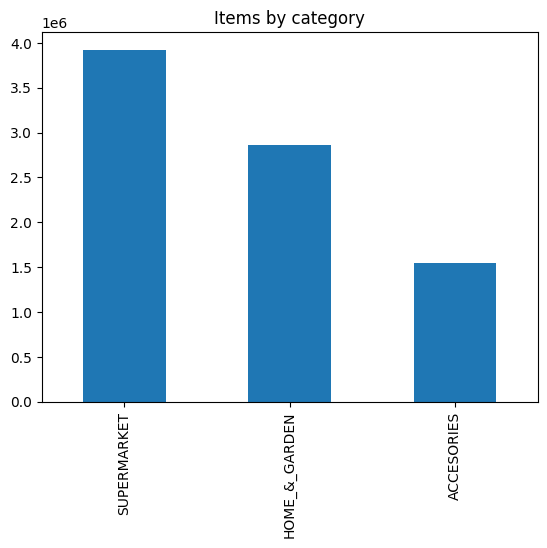

In [8]:
retail_df["category"].value_counts().plot(kind = "bar", title = "Items by category")

<Axes: title={'center': 'Items by department'}>

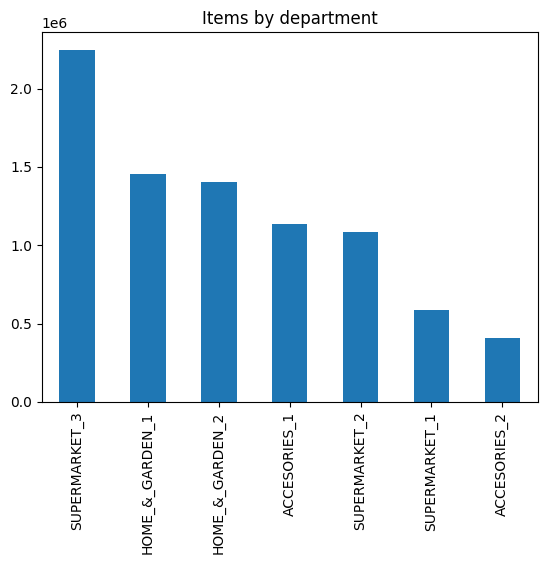

In [9]:
retail_df["department"].value_counts().plot(kind = "bar", title = "Items by department")

También observamos que los items que generan más ganancias pertenecen a la categoría SUPERMARKET.

El departamento con más ganancias es SUPERMARKET 3 seguido de HOME & GARDEN 1.

<Axes: title={'center': 'Revenue by category'}, xlabel='category'>

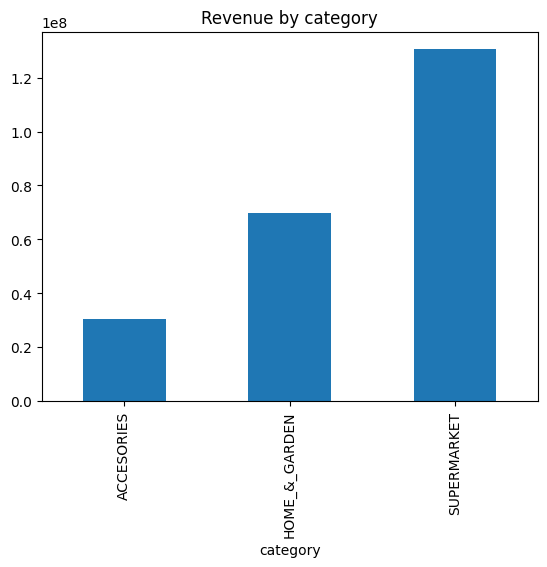

In [10]:
retail_df.groupby('category')["revenue"].sum().plot(kind = "bar", title = "Revenue by category")

<Axes: title={'center': 'Revenue by category'}, xlabel='department'>

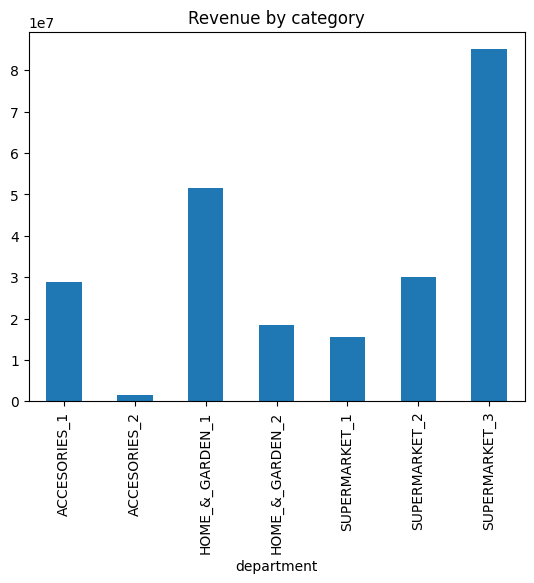

In [11]:
retail_df.groupby('department')["revenue"].sum().plot(kind = "bar", title = "Revenue by category")

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
retail_df.head()

,id,date,item,category,department,store_code,region,store,sales_count,event_NewYear,event_None,event_SuperBowl,event_Thanksgiving,event_Ramadan,sell_price,revenue
0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,True,False,False,NaN,NaN
1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN


In [14]:
retail_df.columns

Index(['id', 'date', 'item', 'category', 'department', 'store_code', 'region',
       'store', 'sales_count', 'event_NewYear', 'event_None',
       'event_SuperBowl', 'event_Thanksgiving', 'event_Ramadan', 'sell_price',
       'revenue'],
      dtype='object')

In [15]:
retail_df['date'] = pd.to_datetime(retail_df['date'], format = '%Y-%m-%d')

In [16]:
retail_df['year'] = retail_df['date'].dt.year
retail_df['month'] = retail_df['date'].dt.month
retail_df['day'] = retail_df['date'].dt.day

In [17]:
retail_df.drop(['date', 'store'], axis=1, inplace=True)

In [18]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   item                object 
 2   category            object 
 3   department          object 
 4   store_code          object 
 5   region              object 
 6   sales_count         int64  
 7   event_NewYear       bool   
 8   event_None          bool   
 9   event_SuperBowl     bool   
 10  event_Thanksgiving  bool   
 11  event_Ramadan       bool   
 12  sell_price          float64
 13  revenue             float64
 14  year                int64  
 15  month               int64  
 16  day                 int64  
dtypes: bool(5), float64(2), int64(4), object(6)
memory usage: 801.8+ MB


In [19]:
retail_df.set_index('id', inplace=True)

In [20]:
retail_df['item'].nunique()

3049

In [21]:
sample = retail_df['item'].sample(200)

In [22]:
sampled_df = retail_df[retail_df['item'].isin(sample)]

In [23]:
sampled_df

,item,category,department,store_code,region,sales_count,event_NewYear,event_None,event_SuperBowl,event_Thanksgiving,event_Ramadan,sell_price,revenue,year,month,day
id,,,,,,,,,,,,,,,,
ACCESORIES_1_017_NYC_1,ACCESORIES_1_017,ACCESORIES,ACCESORIES_1,NYC_1,New York,0,False,False,True,False,False,NaN,NaN,2011,2,6
ACCESORIES_1_017_NYC_1,ACCESORIES_1_017,ACCESORIES,ACCESORIES_1,NYC_1,New York,0,False,False,False,False,False,NaN,NaN,2011,2,13
ACCESORIES_1_017_NYC_1,ACCESORIES_1_017,ACCESORIES,ACCESORIES_1,NYC_1,New York,0,False,False,False,False,False,NaN,NaN,2011,2,20
ACCESORIES_1_017_NYC_1,ACCESORIES_1_017,ACCESORIES,ACCESORIES_1,NYC_1,New York,0,False,False,False,False,False,NaN,NaN,2011,2,27
ACCESORIES_1_017_NYC_1,ACCESORIES_1_017,ACCESORIES,ACCESORIES_1,NYC_1,New York,0,False,False,False,False,False,NaN,NaN,2011,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_734_PHI_3,SUPERMARKET_3_734,SUPERMARKET,SUPERMARKET_3,PHI_3,Philadelphia,22,False,False,False,False,False,2.136,46.992,2016,3,27
SUPERMARKET_3_734_PHI_3,SUPERMARKET_3_734,SUPERMARKET,SUPERMARKET_3,PHI_3,Philadelphia,29,False,False,False,False,False,2.136,61.944,2016,4,3
SUPERMARKET_3_734_PHI_3,SUPERMARKET_3_734,SUPERMARKET,SUPERMARKET_3,PHI_3,Philadelphia,15,False,False,False,False,False,2.136,32.040,2016,4,10


In [24]:

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto', sparse_output=False), ['item', 'category', 'department', 'store_code', 'region'])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

df_encoded = ct.fit_transform(sampled_df)

In [25]:
df_encoded

,one_hot_encoder__item_ACCESORIES_1_017,one_hot_encoder__item_ACCESORIES_1_031,one_hot_encoder__item_ACCESORIES_1_037,one_hot_encoder__item_ACCESORIES_1_051,one_hot_encoder__item_ACCESORIES_1_077,one_hot_encoder__item_ACCESORIES_1_087,one_hot_encoder__item_ACCESORIES_1_100,one_hot_encoder__item_ACCESORIES_1_105,one_hot_encoder__item_ACCESORIES_1_114,one_hot_encoder__item_ACCESORIES_1_117,...,remainder__event_NewYear,remainder__event_None,remainder__event_SuperBowl,remainder__event_Thanksgiving,remainder__event_Ramadan,remainder__sell_price,remainder__revenue,remainder__year,remainder__month,remainder__day
id,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_017_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,NaN,NaN,2011,2,6
ACCESORIES_1_017_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,NaN,NaN,2011,2,13
ACCESORIES_1_017_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,NaN,NaN,2011,2,20
ACCESORIES_1_017_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,NaN,NaN,2011,2,27
ACCESORIES_1_017_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,NaN,NaN,2011,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_734_PHI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,2.136,46.992,2016,3,27
SUPERMARKET_3_734_PHI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,2.136,61.944,2016,4,3
SUPERMARKET_3_734_PHI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,2.136,32.040,2016,4,10


In [26]:
df_encoded.isnull().sum()

one_hot_encoder__item_ACCESORIES_1_017         0
one_hot_encoder__item_ACCESORIES_1_031         0
one_hot_encoder__item_ACCESORIES_1_037         0
one_hot_encoder__item_ACCESORIES_1_051         0
one_hot_encoder__item_ACCESORIES_1_077         0
                                           ...  
remainder__sell_price                     106907
remainder__revenue                        106907
remainder__year                                0
remainder__month                               0
remainder__day                                 0
Length: 226, dtype: int64

In [27]:
df_encoded.fillna(0, inplace=True)

In [28]:
st = time.time()

pca = PCA(n_components = 10)
pca.fit(df_encoded)
pca_df = pca.transform(df_encoded)

et = time.time()
print("Total PCA took {} minutes".format(round((et - st)/60, 2)))

Total PCA took 0.86 minutes


In [29]:
pca_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
id,,,,,,,,,,
ACCESORIES_1_017_NYC_1,-27.838167,-0.750216,-9.762421,-4.501332,-4.052991,2.197947,-0.154151,-0.895480,-0.046879,1.309453
ACCESORIES_1_017_NYC_1,-27.849735,-0.798664,-2.759672,-4.535687,-4.103079,2.207783,-0.153397,-0.895013,-0.046869,1.310073
ACCESORIES_1_017_NYC_1,-27.861304,-0.847103,4.239743,-4.570336,-4.161016,2.218500,-0.152444,-0.894546,-0.046870,1.311008
ACCESORIES_1_017_NYC_1,-27.872872,-0.895541,11.239157,-4.604985,-4.218953,2.229218,-0.151491,-0.894079,-0.046872,1.311943
ACCESORIES_1_017_NYC_1,-27.838117,-0.750954,-9.750718,-4.489339,-3.049689,2.104316,-0.150725,-0.895419,-0.046938,1.312294
...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_734_PHI_3,22.521479,11.341957,11.435353,-1.312773,-3.686979,-2.555710,-0.585618,0.574438,-0.801189,-0.370830
SUPERMARKET_3_734_PHI_3,38.578615,15.498170,-12.498941,-0.918825,-2.489421,-2.631060,-0.561164,0.584268,-0.799610,-0.358030
SUPERMARKET_3_734_PHI_3,6.532201,7.467997,-5.610186,-1.480378,-2.554286,-2.728634,-0.608404,0.561995,-0.802902,-0.382796


In [30]:
sum(pca.explained_variance_ratio_)

0.9994296460879885

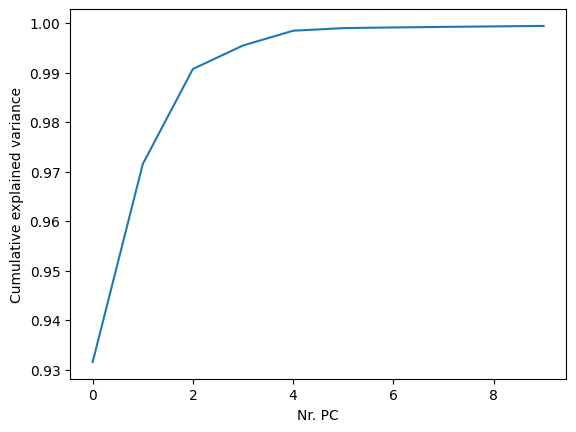

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nr. PC')
plt.ylabel('Cumulative explained variance');

In [32]:
st = time.time()

sse = {}

for k in range(1, 8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    sse[k] = kmeans.inertia_
    
et = time.time()
print("Total Elbow curve took {} minutes".format(round((et - st)/60, 2)))

Total Elbow curve took 3.04 minutes


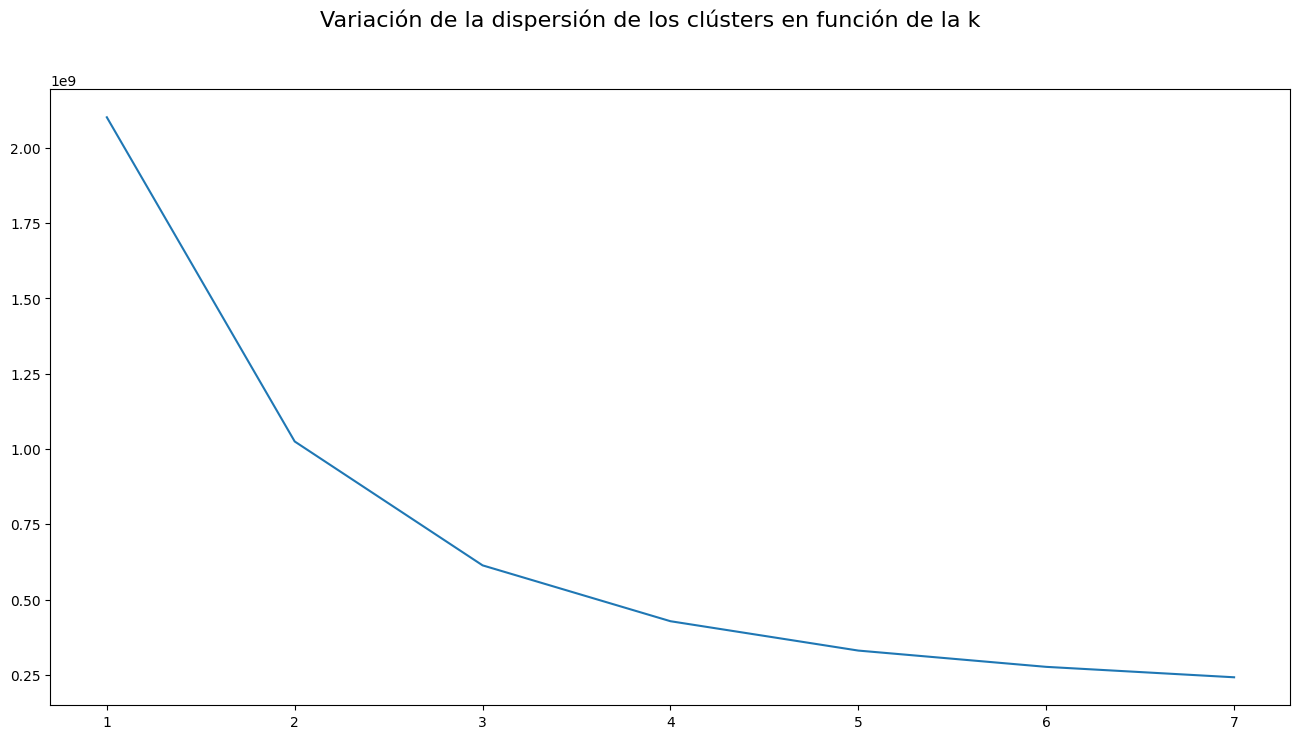

In [33]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
ax.set_xticks(np.arange(1, 8))
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [34]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pca_df)

KMeans(n_clusters=5)

In [35]:
sampled_df["cluster"] = kmeans.labels_

In [36]:
sampled_df.groupby("cluster").size()

cluster
0    391135
1       987
2     23531
3    103432
4      5075
dtype: int64

In [37]:
sampled_df.groupby('cluster')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,284228.0,8.944892,9.237276,0.000,0.0000,6.800,15.6000,31.0688
1,987.0,787.419963,209.132043,513.600,636.4848,724.776,864.2000,2106.0000
2,23531.0,149.868879,39.961698,62.640,116.9280,138.600,177.0720,256.6250
3,103432.0,52.998550,18.908957,9.216,37.2480,47.808,65.6640,104.1390
4,5075.0,354.585065,82.983884,232.800,287.0400,335.250,407.6184,584.0250


Si nos fijamos en las ganancias, vemos que el grupo 1, que podriamos llamarlo top products, tiene unas ganancias medias muy superiores a los otros grupos. La ganancia minima es superior al percentil 75 del siguiente grupo con mas ganancias. El maximo quatriplica las ganancias maximas del grupo "perseguidor". Ademas, todo esto sabiendo que el numero de productos es muy inferior al de los otros grupos. De esta manera podemos pensar que este grupo de productos o tiene un precio muy superior al de los demas o que se vende mucho mas, luego lo veremos.
Por otro lado, tenemos el grupo 0 que podriamos llamarlo "worst products" ya que vemos que siendo un numero muy grande de productos, tenemos ganancias muy muy bajas, ya sea, igual que anteriormente, por precios bajos o por pocas ventas, luego lo veremos. Así, podemos ver que la media de este grupo no llega ni a la mitad del siguiente y su maximo es 1/3 de este.
En el resto de grupos, aunque seguimos viendo diferencias, no son tan exageradas y representativas como en estos dos.

In [38]:
sampled_df.groupby('cluster')['sell_price'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,284228.0,5.500906,4.203146,0.060,2.6334,4.20,7.4250,34.3140
1,987.0,7.924413,4.812680,1.200,3.0000,7.45,13.2601,22.4625
2,23531.0,9.147290,6.546559,0.240,3.1000,7.45,13.2601,25.6625
3,103432.0,6.463509,5.042069,0.060,2.8560,4.90,8.7125,25.6625
4,5075.0,10.310558,6.553070,1.128,4.9250,7.45,15.8669,25.6625


Hablamos ahora de precio de ventas. Si nos fijamos en el grupo 0, el que aportava menos ganancias, vemos que la media es la mas baja de todas, aunque no hay una diferencia muy grande pero que tienen el producto mas caro. Asi, vemos que este grupo que hay un numero muy elevado de productos tiene el producto mas barato y mas caro. Si hablamos del grupo 1 que era el que mas ganancias daba, vemos que el precio del producto es similar a los otros grupos. En general, el sell price de los productos es similar en todos los clusters i no nos aporta mucha informacion, de manera que la diferencia de ganancias probablemente sera debida al numero de ventas. Podemos ver que tanto medias como maximos y minimos son similares en todos los clusters, destacando el grupo 4 que alomejor tiene unos precios mas elevados.

In [39]:
sampled_df.groupby('cluster')['sales_count'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,391135.0,2.074031,4.110751,0.0,0.0,0.0,3.0,83.0
1,987.0,151.557244,115.326978,27.0,66.0,103.0,216.0,714.0
2,23531.0,31.342059,31.744348,5.0,11.0,20.0,41.0,426.0
3,103432.0,15.052904,16.273966,2.0,6.0,10.0,18.0,256.0
4,5075.0,59.704433,57.047475,11.0,22.0,41.0,71.0,415.0


Vamos a hablar ahora de numero de ventas, donde deberiamos ver las diferencias mas significativas y el porque de la diferencia en cuanto a ganancias totales, ya que en el precio hay bastantes similitudes. Asi, empezamos fijandonos en el grupo 1, top products, que tiene unas ganancias muy superiores a los demas. Vemos que esto se debe al numero de ventas. Con un numero de productos mucho menor a los demas (lo que indica que tenemos un grupo reducido de productos estrella a los que tenemos que dar importancia), tenemos un numero de ventas mas elevado que en cualquier otro grupo. La media es muy superior a los siguientes grupos, 2 y 4. Tenemos una media que triplica al perseguidor (4). En cuanto a maximos y minimos, vemos tambien que hay muchas diferencias. El grupo 1 tiene tanto maximos como minimos de casi el doble del grupo 4. Asi, vemos que el numero de ventas de estos productos es muy superior al de los demas, dandonos unas ganancias tan grandes como las comentadas anteriormente.
En cuanto al grupo 0, en el que tenemos un gran numero de productos, vemos que estos tienen unas ventas muy bajas y por eso tenemos unas ganancias tan pequeñas.
Con estos resultados sacamos las conclusiones de que las ganancias dependen sobretodo del numero de ventas, que tenemos un grupo muy pequeño de productos extremadamente popular y una gran cantidad de productos que practicamente no se venden.
Por otro lado, los otros 3 grupos siguen una tendencia creciente tanto de revenue como de ventas de 3, 2, a 4.
Tenemos que tener en cuenta asi que productos son realmente importantes, grupo 1 sobretodo y 4 y que productos no se venden tanto, grupo 0.

In [40]:
sampled_df.groupby('cluster')['region'].value_counts()

cluster  region      
0        New York        148606
         Boston          121655
         Philadelphia    120874
1        New York           615
         Philadelphia       319
         Boston              53
2        New York         11491
         Boston            6618
         Philadelphia      5422
3        New York         46330
         Philadelphia     29569
         Boston           27533
4        New York          2622
         Boston            1389
         Philadelphia      1064
Name: region, dtype: int64

Si hablamos de regiones por clusters, podemos ver que todos los grupos siguen una tendencia parecida y la mayoria de productos estan o se venden mayoritariamente en NY, seguido en menor medida en Philadelphia y con valores parecidos boston, pero no encontramos grandes diferencias entre ellos (mas alla del numero total, que ya sabemos que es por el numero de productos totales "count" del cluster).
Asi, afirmamos que los grupos se crean por el revenue que viene dado por el numero de ventas, ya que no vemos grandes diferencias en el precio ni en la region en el producto.
Asi, con precios similares, tenemos productos que se venden mucho y otros que se venden poco.